## Explorando arquivo de texto


In [8]:
import pandas as pd
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import collections, re
from bs4 import BeautifulSoup 
#nltk.download()

#### Manipulação do arquivo

- Vamos iniciar lendo o arquivo, em seguida vamos ver a quantidade de linhas x colunas e por fim os nomes das colunas.O arquivo é a saída do web crawler que está disponível no <a href="https://github.com/riatsunik/Proj_glassdoor_crawler_part1">link</a> e o mesmo deve estar na mesma pasta do Script.

In [4]:
book = pd.read_csv('booksdata.csv')
print(book.shape)
print(book.columns.values)

(914, 5)
['title' 'local' 'company_name' 'salary' 'description']


- Se seu resultado for próximo (quantidade linhas) ao output acima então podemos prosseguir, armazenando a coluna que nos interessa 'description' (descrição das vagas de emprego).

In [5]:
description_text = book['description']

#### Função para limpar os textos

- Conforme vimos nas seções anteriores temos um total de 898 descrições de vagas, para poder tratar uma a uma precisamos criar uma função que possa ser chamada varias vezes. Os detalhes das funções estão comentadas em inglês.


In [62]:
def description_to_words( raw_description ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    description_text = BeautifulSoup(raw_description,"lxml").get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", description_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(nltk.corpus.stopwords.words('english'))                
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))    

In [64]:
clean_description = nltk.word_tokenize(description_to_words(description_text[0]))
print (clean_description)

['factual', 'love', 'things', 'data', 'mission', 'organize', 'interpret', 'worlds', 'location', 'information', 'data', 'scientist', 'partner', 'services', 'team', 'opportunity', 'work', 'directly', 'customers', 'query', 'filter', 'aggregate', 'analyze', 'explain', 'visualize', 'happening', 'physical', 'world', 'data', 'scientist', 'knows', 'tools', 'algorithms', 'analyze', 'data', 'understands', 'find', 'shape', 'underlying', 'structure', 'working', 'partner', 'services', 'team', 'youll', 'apply', 'analytics', 'bridge', 'gap', 'factuals', 'established', 'products', 'huge', 'variety', 'questions', 'trying', 'answer', 'skilled', 'communicator', 'provide', 'compelling', 'appropriate', 'explanation', 'guidance', 'critical', 'existing', 'potential', 'customers', 'strong', 'engineering', 'experience', 'enjoy', 'working', 'rapidly', 'changing', 'environment', 'ship', 'youll', 'analyze', 'interpret', 'solve', 'range', 'location', 'data', 'problems', 'design', 'experiments', 'work', 'fellow', '

In [76]:
# Get the number of reviews based on the dataframe column size
num_description = description_text.size
print(num_description)

914


In [77]:
# Initialize an empty list to hold the clean reviews
clean_train_description = []

In [78]:
# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range( 0, num_description ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_train_description.append(nltk.word_tokenize(description_to_words( description_text[i] )) )

In [14]:
##### WORDCLOUD ####

In [66]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [67]:
wordcloud = WordCloud(
        background_color='white',
        stopwords=None,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(clean_train_description))

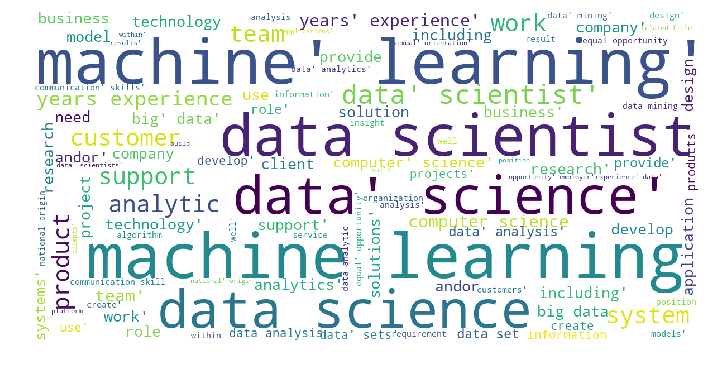

In [68]:
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [69]:
bagsofwords = [collections.Counter(re.findall(r'\w+', txt))
            for txt in clean_train_description]

TypeError: expected string or bytes-like object

In [19]:
sumbags = sum(bagsofwords, collections.Counter())

In [20]:
bagsofwords[0].most_common(10)

[('data', 10),
 ('analyze', 3),
 ('interpret', 2),
 ('location', 2),
 ('scientist', 2),
 ('partner', 2),
 ('services', 2),
 ('team', 2),
 ('work', 2),
 ('customers', 2)]

In [21]:
sumbags.most_common(100)

[('data', 8469),
 ('experience', 4357),
 ('work', 2098),
 ('business', 1984),
 ('learning', 1852),
 ('team', 1710),
 ('science', 1705),
 ('skills', 1607),
 ('analysis', 1478),
 ('machine', 1438),
 ('analytics', 1427),
 ('ability', 1253),
 ('years', 1186),
 ('models', 1106),
 ('research', 1076),
 ('solutions', 1072),
 ('new', 1069),
 ('scientist', 1066),
 ('development', 1064),
 ('statistical', 1032),
 ('knowledge', 1007),
 ('strong', 966),
 ('company', 889),
 ('working', 883),
 ('techniques', 861),
 ('develop', 851),
 ('tools', 836),
 ('using', 808),
 ('engineering', 803),
 ('problems', 787),
 ('information', 781),
 ('design', 779),
 ('including', 779),
 ('technical', 770),
 ('product', 765),
 ('degree', 764),
 ('job', 750),
 ('modeling', 750),
 ('python', 749),
 ('statistics', 742),
 ('systems', 741),
 ('analytical', 735),
 ('advanced', 724),
 ('support', 724),
 ('required', 722),
 ('environment', 701),
 ('related', 690),
 ('us', 678),
 ('computer', 663),
 ('technology', 656),
 ('insi

In [30]:
from nltk.probability import FreqDist

In [79]:
print(clean_train_description[0])

['factual', 'love', 'things', 'data', 'mission', 'organize', 'interpret', 'worlds', 'location', 'information', 'data', 'scientist', 'partner', 'services', 'team', 'opportunity', 'work', 'directly', 'customers', 'query', 'filter', 'aggregate', 'analyze', 'explain', 'visualize', 'happening', 'physical', 'world', 'data', 'scientist', 'knows', 'tools', 'algorithms', 'analyze', 'data', 'understands', 'find', 'shape', 'underlying', 'structure', 'working', 'partner', 'services', 'team', 'youll', 'apply', 'analytics', 'bridge', 'gap', 'factuals', 'established', 'products', 'huge', 'variety', 'questions', 'trying', 'answer', 'skilled', 'communicator', 'provide', 'compelling', 'appropriate', 'explanation', 'guidance', 'critical', 'existing', 'potential', 'customers', 'strong', 'engineering', 'experience', 'enjoy', 'working', 'rapidly', 'changing', 'environment', 'ship', 'youll', 'analyze', 'interpret', 'solve', 'range', 'location', 'data', 'problems', 'design', 'experiments', 'work', 'fellow', '

In [94]:
fd1 = FreqDist(line for line in clean_train_description)
print(fd1)

TypeError: unhashable type: 'list'

In [85]:
teste = (raw for raw in clean_train_description)

In [88]:
for raw in clean_train_description:
    print(raw)

['factual', 'love', 'things', 'data', 'mission', 'organize', 'interpret', 'worlds', 'location', 'information', 'data', 'scientist', 'partner', 'services', 'team', 'opportunity', 'work', 'directly', 'customers', 'query', 'filter', 'aggregate', 'analyze', 'explain', 'visualize', 'happening', 'physical', 'world', 'data', 'scientist', 'knows', 'tools', 'algorithms', 'analyze', 'data', 'understands', 'find', 'shape', 'underlying', 'structure', 'working', 'partner', 'services', 'team', 'youll', 'apply', 'analytics', 'bridge', 'gap', 'factuals', 'established', 'products', 'huge', 'variety', 'questions', 'trying', 'answer', 'skilled', 'communicator', 'provide', 'compelling', 'appropriate', 'explanation', 'guidance', 'critical', 'existing', 'potential', 'customers', 'strong', 'engineering', 'experience', 'enjoy', 'working', 'rapidly', 'changing', 'environment', 'ship', 'youll', 'analyze', 'interpret', 'solve', 'range', 'location', 'data', 'problems', 'design', 'experiments', 'work', 'fellow', '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [82]:
print(fd1['data'])

10


In [83]:
print(fd1.most_common(10))

[('data', 10), ('analyze', 3), ('interpret', 2), ('location', 2), ('scientist', 2), ('partner', 2), ('services', 2), ('team', 2), ('work', 2), ('customers', 2)]
